### **Necessary libraries**

In [ ]:
import pandas as  pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import decomposition, datasets
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# **Random Forest Regression**

## **What is Random Forest Regression?**

It is a Machine Learning algorithm based on bagging algorithm and uses Ensemble Learning technique. It is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging combining the output of all the trees to improve the predictive accuracy and control over-fitting.

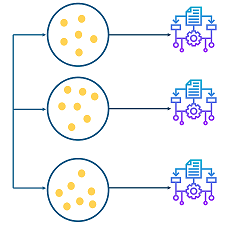

    Bagging Random Forest

## **Objective**

The purpose of using Random Forest Regression is to predict the Monthly Income that employees whould have according to all the characteristics mentioned in our dataset. 

We analyze the results obtained comparing the predictions with the real value of test data or invented points that make sense to discuss if this is good method to predict values in our dataset

## **Why we use Random Forest Regression?**

We have chosen Random Forest Regression because we have already tried classification models but now we want a model to predict continuous values such as Monthly Income and we chose this method because it does no need data normalization as it uses rule based approach instead of distance calculation.

It is usually robust to outliers and can handle them automatically also is comparatively less impacted by noise.

We have also tried Linear Regression and Polynomial Regression but we obtained bad results in the predictions. The predictions were ok for the test data but very bad for new points that we created. The polynomial Regression was very inefficient since we already have lots of features. 

## **Import the data**

We started loading the clean data that we have pepared before with only numerical data and we take a look at its content.

In [ ]:
data = input("Enter the route of the dataset (Attrition.csv):")
df = pd.read_csv(data)
df.info()

Enter the route of the dataset (Attrition.csv):/content/Attrition.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Unnamed: 0                1470 non-null   int64
 1   Age                       1470 non-null   int64
 2   Attrition                 1470 non-null   int64
 3   BusinessTravel            1470 non-null   int64
 4   DailyRate                 1470 non-null   int64
 5   Department                1470 non-null   int64
 6   DistanceFromHome          1470 non-null   int64
 7   Education                 1470 non-null   int64
 8   EducationField            1470 non-null   int64
 9   EnvironmentSatisfaction   1470 non-null   int64
 10  Gender                    1470 non-null   int64
 11  HourlyRate                1470 non-null   int64
 12  JobInvolvement            1470 non-null   int64
 13  JobLevel               

In [ ]:
df = df.drop("Unnamed: 0", axis=1) #drop of the extra column that is created when loading the file
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
5,32,0,2,1005,1,2,2,1,4,1,...,3,3,0,8,2,2,7,7,3,6
6,59,0,1,1324,1,3,3,3,3,0,...,4,1,3,12,3,2,1,0,0,0
7,30,0,1,1358,1,24,1,1,4,1,...,4,2,1,1,2,3,1,0,0,0
8,38,0,2,216,1,23,3,1,4,1,...,4,2,0,10,2,3,9,7,1,8
9,36,0,1,1299,1,27,3,3,3,1,...,3,2,2,17,3,2,7,7,7,7


## **Some visualizations**

Let's see how the histogram of Montly income looks like

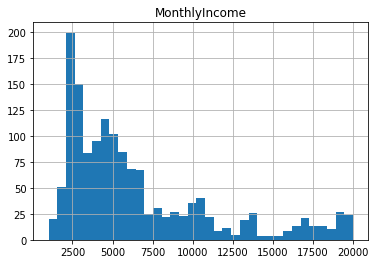

In [ ]:
df.hist("MonthlyIncome", bins=35)
plt.show()

Now a scatter plot between each variable and the monthly income

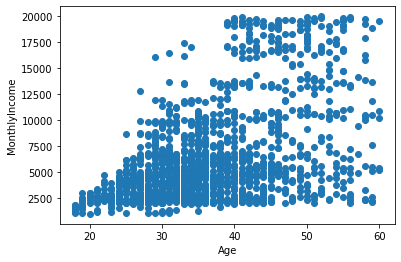

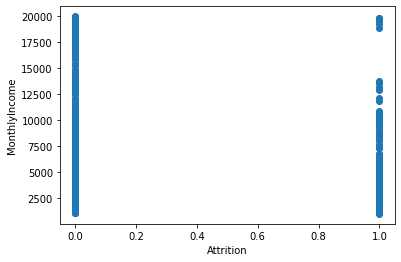

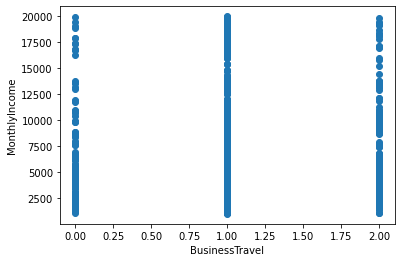

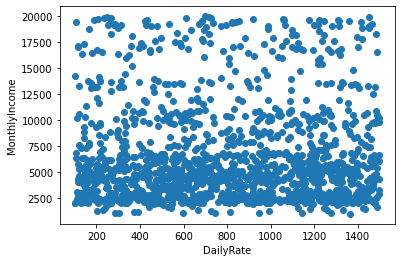

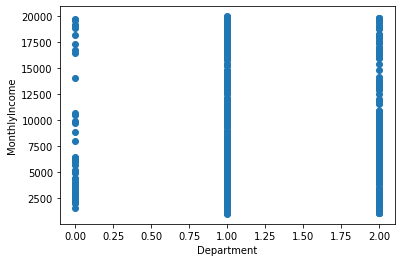

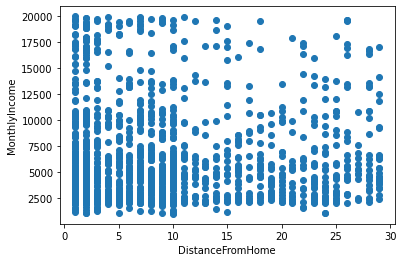

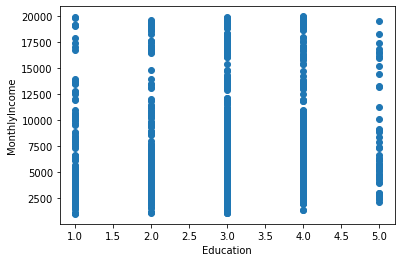

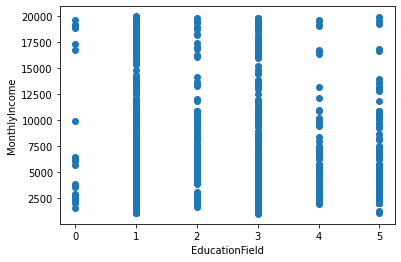

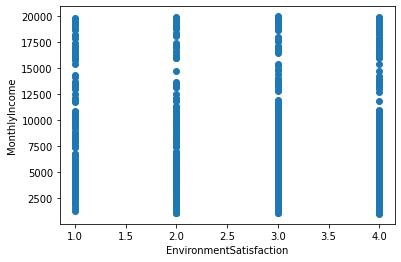

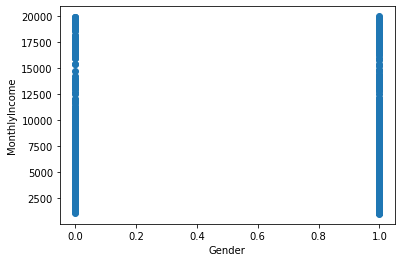

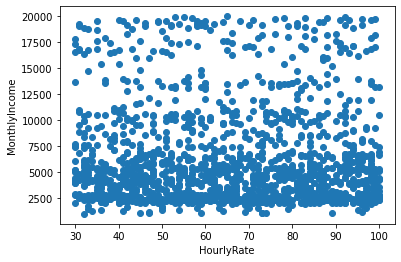

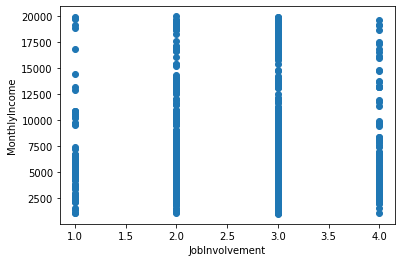

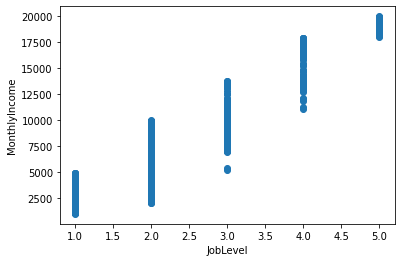

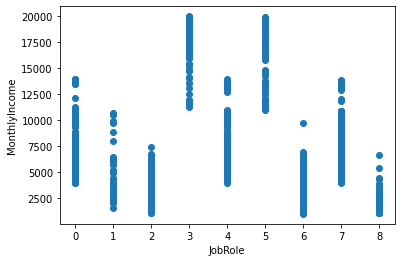

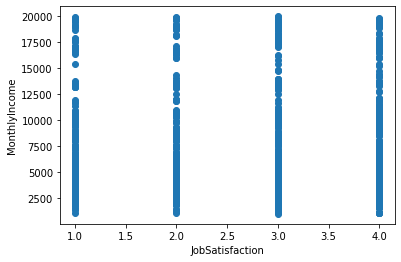

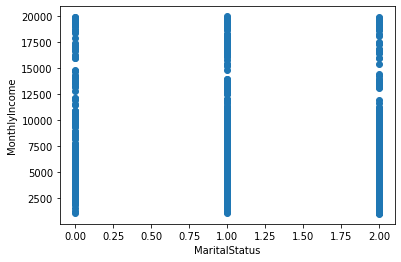

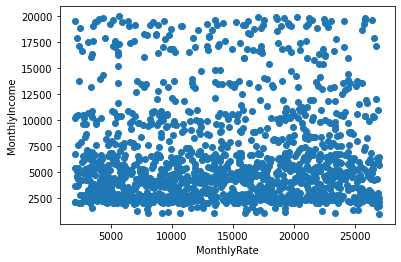

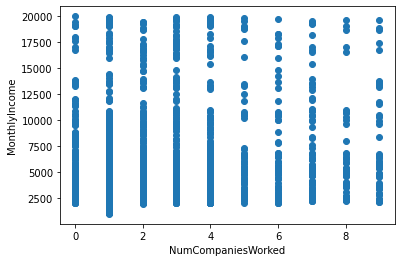

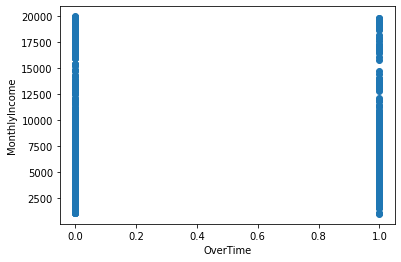

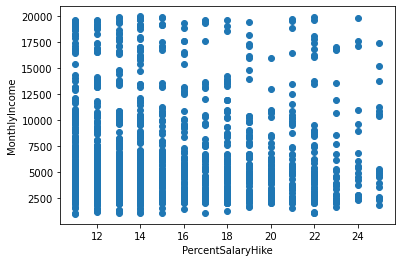

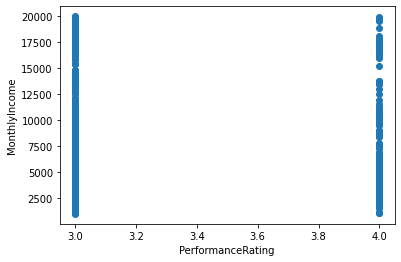

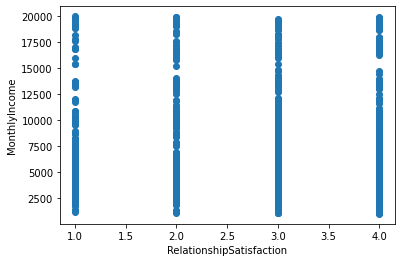

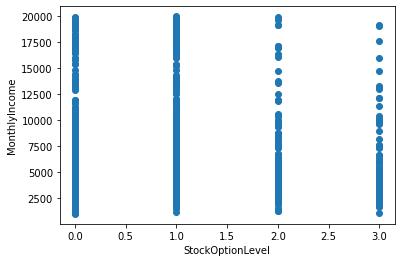

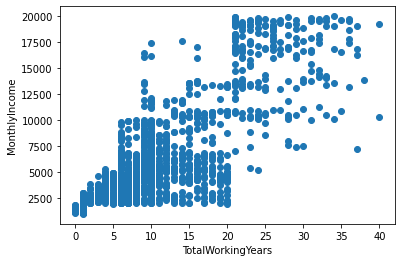

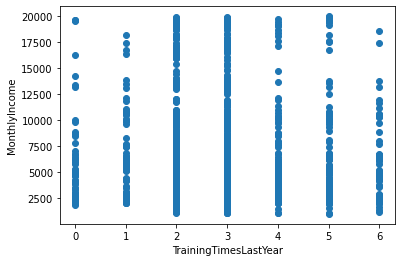

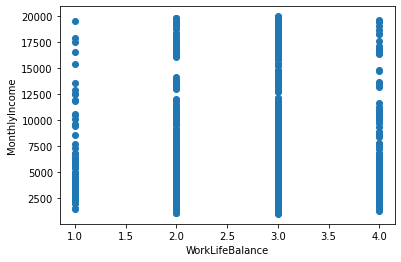

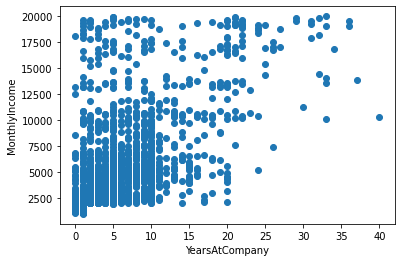

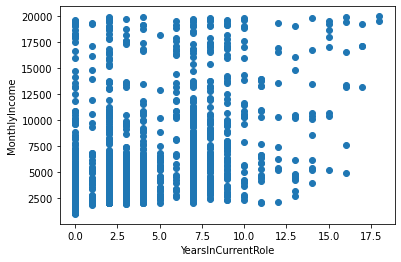

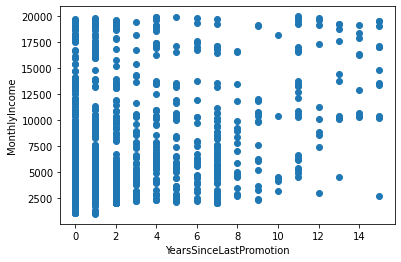

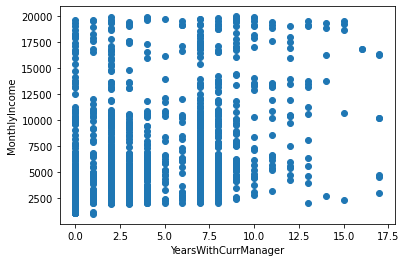

In [ ]:
for key in df.drop("MonthlyIncome",axis=1).keys():
  plt.scatter(df[key], df['MonthlyIncome'])
  plt.ylabel('MonthlyIncome')
  plt.xlabel(key)
  plt.show()

From these plots we can conclude that monthly income is correlated with the years at company or total years working and job level, that means that the more years of experience you have the more you earn, which make sense. Also we can see that the roles of MANAGER and RESEARCH DIRECTOR are the best paid ones, 

## **Set up**

We define our variables and target for the train

In [ ]:
# X variable contains all columns except MonthlyIncome and the extra column Unamed: 0

X = df.drop(columns=["MonthlyIncome"], axis=1)

# y target is the Monthly Income

y = df['MonthlyIncome']  

print(X.shape, "\n", y.shape)

(1470, 30) 
 (1470,)


Divide data in Train and Test :

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1176, 30) (294, 30) (1176,) (294,)


## **Model fiting, training and test**

Now using sklearn functions, we created our random forest regression model and we fit it to the training data:

In [ ]:
# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with X and y train data
regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

And we test the model to see if the result make sense

In [ ]:
y_pred = regressor.predict(X_test)
y_test = np.array(y_test) #we convert the test to an array so we can access to it with y_test[i]

for i in range(0,30):
  print("Real value:",y_test[i], "predicted one:", y_pred[i])


Real value: 8463 predicted one: 6389.04
Real value: 4450 predicted one: 3889.92
Real value: 1555 predicted one: 2067.39
Real value: 9724 predicted one: 11118.0
Real value: 5914 predicted one: 5183.1
Real value: 2579 predicted one: 3003.87
Real value: 4230 predicted one: 2883.25
Real value: 2232 predicted one: 2945.04
Real value: 8865 predicted one: 10009.84
Real value: 2269 predicted one: 2177.49
Real value: 3294 predicted one: 2930.22
Real value: 10231 predicted one: 9466.95
Real value: 5933 predicted one: 5510.63
Real value: 2213 predicted one: 3088.52
Real value: 3375 predicted one: 2893.34
Real value: 4968 predicted one: 3293.0
Real value: 6294 predicted one: 6020.31
Real value: 2743 predicted one: 3490.42
Real value: 11849 predicted one: 8952.77
Real value: 17007 predicted one: 15961.54
Real value: 3479 predicted one: 3258.2
Real value: 5070 predicted one: 5047.74
Real value: 9204 predicted one: 6261.27
Real value: 5605 predicted one: 5969.55
Real value: 6392 predicted one: 6198.9

We can see in the predictions above that some predictions are very close to the real value, but also, some predictions are thousands of units far from the real value so lets see the list of absolute difference to see the best and worst predictions, mean and standard deviation:

In [ ]:
#stored absolute difference with 2 decimals
predictions_error = [[round(abs(t-p), 2), t] for t, p in zip(y_test, y_pred)] 

#sorting the predictions error from lower to higher 
best_predictions = sorted(predictions_error, key = lambda x : x[0])

#left value is the absolute difference with the prediction and right value is the real value 
print("best predictions:", best_predictions[:5], "\n")
print("worst predictions:", best_predictions[-6:],"\n")
print("mean:", sum(best_predictions[0])/len(best_predictions[0]),'\n')

best predictions: [[8.41, 2821], [13.43, 19161], [20.7, 6120], [22.26, 5070], [23.96, 5916]] 

worst predictions: [[3591.32, 7082], [3645.02, 8926], [3801.44, 9998], [4093.15, 9957], [4406.44, 9715], [4696.07, 9936]] 

mean: 1414.705 



## **Testing the model with new instances**

As we can see, the method is able to do good predictions sometimes but also predictions with a lot of error. 

Now lets check if we can obtain good results using new instances:

In [ ]:
#We created an instance called Oguz and Dimos with values that "makes more or less sense"
Oguz = [[
          33,         #0age
          0,          #1attrition
          2,          #2business travel
          1300,       #3daily rate
          1,          #4department
          3,          #5distance from home
          4,          #6eduction
          1,          #7education field
          4,          #8environment satisfaction
          1,          #9gender
          55,         #10Hourly rate
          3,          #11job involvement
          1,          #12job level
          6,          #13job role
          3,          #14job satisfaction
          1,          #15marital status
          #2909 value to predict
          23456,      #16monthly rate
          1,          #17numcompanies worked
          1,          #18over time
          11,         #19percent salary hike
          3,          #20performance rating
          3,          #21relations satisfaction
          0,          #22stock option levels
          8,          #23total working years
          3,          #24training times last years
          3,          #25work life balance
          8,          #26years at company
          7,          #27years in current role
          3,          #28years since last promotion
          1]]         #29years with current manager

Dimos = [[
          30,         #0age
          0,          #1attrition
          3,          #2business travel
          1020,       #3daily rate
          2,          #4department
          13,         #5distance from home
          5,	        #6eduction
          5,	        #7education field
          4,	        #8environment satisfaction
          1,	        #9gender
          99,         #10Hourly rate
          4,	        #11job involvement
          6,	        #12job level
          4,          #13job role
          2,          #14job satisfaction
          2,          #15marital status
          #19206 value to predict
          16117,      #16monthly rate
          1,          #17numcompanies worked
          0,          #18over time
          13,         #19percent salary hike
          3,          #20performance rating
          1,          #21relations satisfaction
          0,          #22stock option levels
          10,         #23total working years
          5,          #24training times last years
          3,          #25work life balance
          10,         #26years at company
          0,          #27years in current role
          1,          #28years since last promotion
          8]]         #29years with current manager

pred_Oguz = regressor.predict(Oguz)[0] # [0] to have the value and not the value inside a list
pred_Dimos = regressor.predict(Dimos)[0]
print("Oguz Income:", pred_Oguz,"original:", 2909, "\nDimos Income:", pred_Dimos, "Original:", 19206)

Oguz Income: 2929.19 original: 2909 
Dimos Income: 19339.14 Original: 19206


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


We can see that the model is able to do very good predictions with new instances but maybe it is not the case for all possible new instances since we have seen that the test data had some bad results.

## **Conclusions**

Finally we were able to do predictions of the Monthly income, usually good predictions but sometimes there were predictions with a lot of error. We did not need to scale the data so it was easier for us to fit the model with the data and the model handled automatically the outliers. 

We were able to do very good predictions we new instances so we think that it is a good model for this data but it can be better, of course.